In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

1.12.0


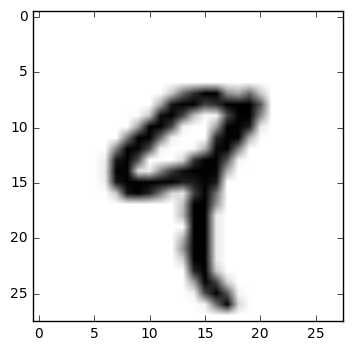

The Number is:  9


In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[4], cmap=plt.cm.binary)
plt.show()

print("The Number is: ", y_train[4])

In [14]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.2684 - acc: 0.9213
Epoch 2/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.1124 - acc: 0.9655
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0760 - acc: 0.9760
Epoch 4/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0567 - acc: 0.9818
Epoch 5/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.0427 - acc: 0.9862


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc) 

model.save('epic_num_reader.model')

10000/10000 [==============================] - 1s 70us/step
0.09304094653241336
0.9732


In [22]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(np.argmax(predictions[75]))

7


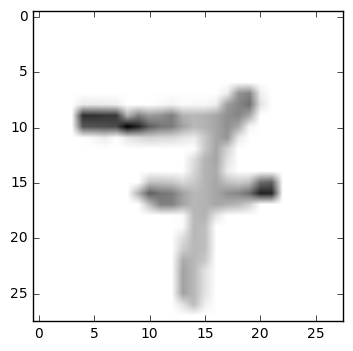

In [21]:
plt.imshow(x_test[75], cmap=plt.cm.binary)
plt.show()